# Exploration des données

In [2]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

Le fichier <a href='http://qa.epidemium.cc/data/mortality_dataset/2017-25-10_mortality/mortality.csv'>Mortality.txt</a> contient les informations sur le nombre de décès par type de cancer, sex, tranche d'age et par pays. Les colonnes correspondantes sont :
- Nb_deaths
- Cancer_code
- Sex
- Age_bucket
- Location
- Year

In [3]:
#Chargement des données
df_mort= pd.read_table('mortality.txt',delimiter=';',names=['Cancer_code', 'Sex', 'Age_bucket', 'Location', 'Year', 'Nb_deaths'],low_memory=False)

In [4]:
#Visualisation des 5 premières lignes
df_mort.head(5)

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths
0,C80,2,1,Jamaica,2000,2
1,C80,2,2,Jamaica,2000,0
2,C80,2,3,Jamaica,2000,1
3,C80,2,4,Jamaica,2000,0
4,C80,2,5,Jamaica,2000,0


In [5]:
#Nombre de lignes et de colonnes
df_mort.shape

(6359642, 6)

In [6]:
#Description du data set
df_mort.describe(include='all')

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths
count,6359642,6.359642e+06,6.359642e+06,6359642,6.359642e+06,6.359642e+06
unique,94,NaN,NaN,153,NaN,NaN
top,C16,NaN,NaN,Japan,NaN,NaN
freq,197201,NaN,NaN,103645,NaN,NaN
mean,NaN,1.540061e+00,1.000000e+01,NaN,1.992326e+03,3.230369e+01
std,NaN,6.528709e-01,5.477226e+00,NaN,1.609652e+01,2.649799e+02
min,NaN,1.000000e+00,1.000000e+00,NaN,1.950000e+03,0.000000e+00
25%,NaN,1.000000e+00,5.000000e+00,NaN,1.981000e+03,0.000000e+00
50%,NaN,2.000000e+00,1.000000e+01,NaN,1.996000e+03,0.000000e+00
75%,NaN,2.000000e+00,1.500000e+01,NaN,2.006000e+03,5.000000e+00


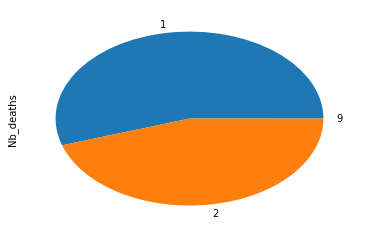

In [7]:
# Répartition des sexes
mort_by_sex = df_mort.groupby(['Sex'])['Nb_deaths'].sum()
mort_by_sex.plot.pie()

Il y a donc moins de femmes atteints par le cancer que d'hommes dans le data set.

Text(0.5,1,'Number of deads by cancer')

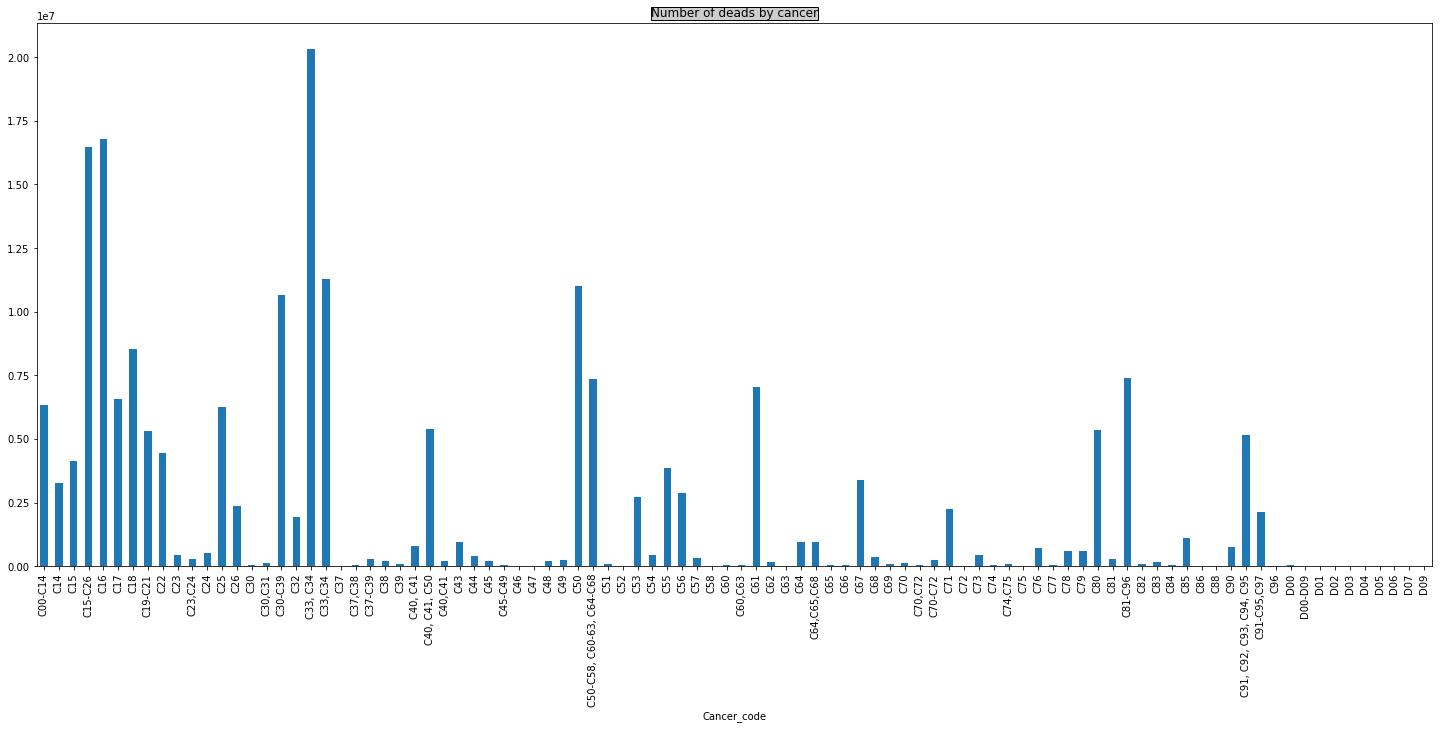

In [8]:
#Mortalité par type de cancer
mort_by_cancer = df_mort.groupby(['Cancer_code'])['Nb_deaths'].sum()
mort_by_cancer.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of deads by cancer', bbox={'facecolor':'0.8', 'pad':0})

Nous remarquons que le cancer C33,C34 (tumeur maligne de la trachée, de la bronche et du poumon)est le plus present.
Nous avons donc décidé de choisir ce cancer parce qu'il est le plus mortel dans la base de données mais aussi parce qu'il est l'un des cancers les plus mortels dans le monde entier.

In [11]:
# On se restreint au cancer et à la période choisi 
df_mort=df_mort[((df_mort['Cancer_code']=='C33,C34') | (df_mort['Cancer_code']=='C33, C34')) & (df_mort['Year']>=2000)]

Text(0.5,1,'Number of deads from 2000 to 2015')

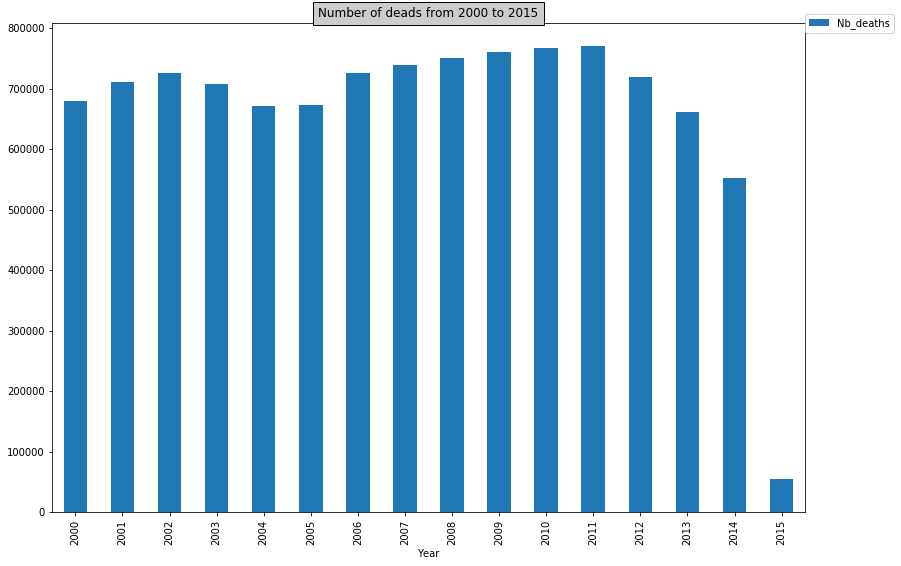

In [20]:
#le nombre de morts de 2000 à 2015
mort_by_year=df_mort.groupby(['Year'])['Nb_deaths'].sum()
explode = (0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0)
mort_by_year.transpose().plot(kind='bar',figsize=(13.5, 9))
plt.legend(bbox_to_anchor=(1, 1), loc=6, borderaxespad=0.)
plt.title('Number of deads from 2000 to 2015', bbox={'facecolor':'0.8', 'pad':5})

Nous observons un nombre de mortalité plus élevé dans l'ensemble des pays en 2011 et une chute considérable de ce nombre en 2015.

Text(0.5,1,'Number of deads by age bucket')

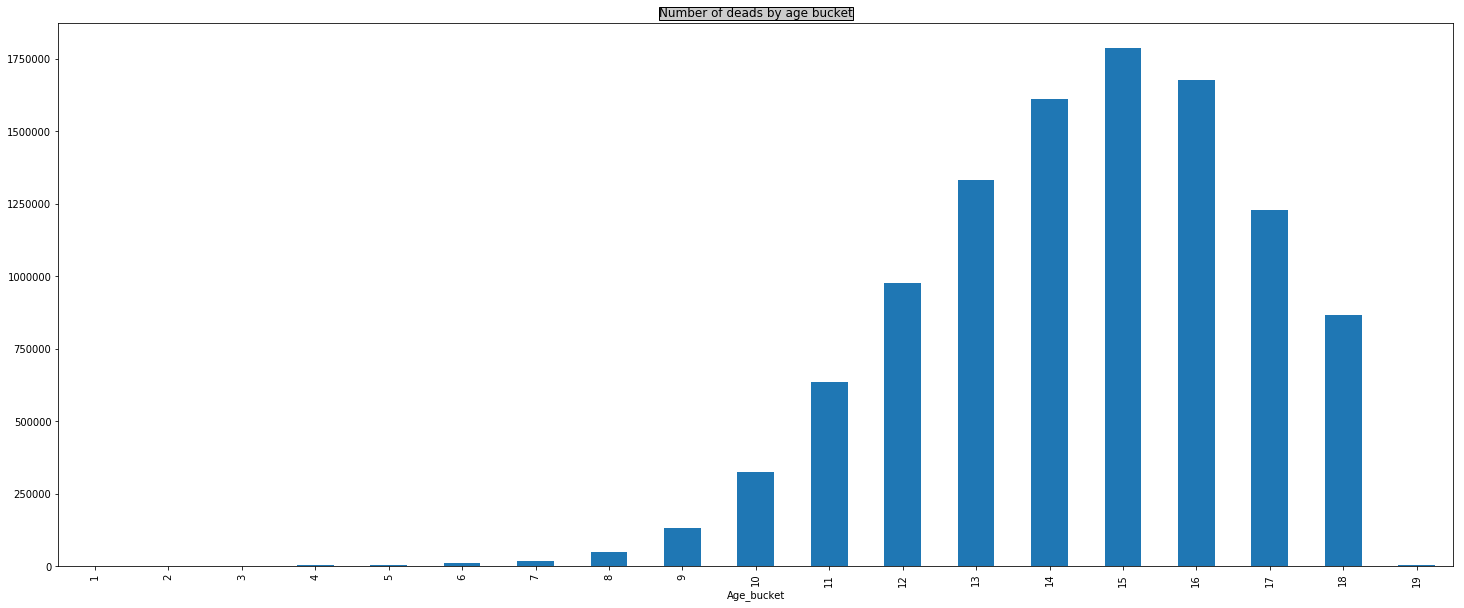

In [13]:
#Nombre de morts du cancer C33,C34 par tranche d'age
mort_by_cancer = df_mort.groupby(['Age_bucket'])['Nb_deaths'].sum()
mort_by_cancer.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of deads by age bucket', bbox={'facecolor':'0.8', 'pad':0})

La tranche d'age la plus touchée par le cancer C33,C34 est 14 c'est à dire entre 65ans et 69ans.

Text(0.5,1,'Number of deads by cancer')

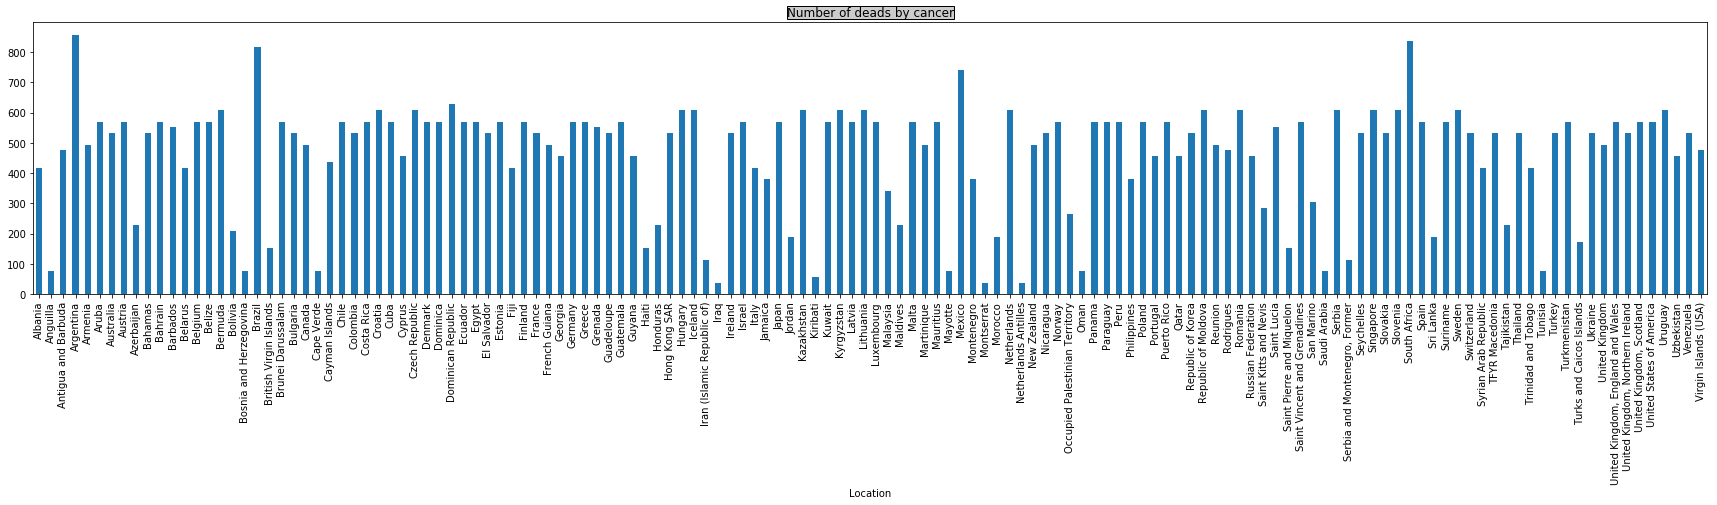

In [14]:
df_by_country = df_mort.groupby(['Location'])['Nb_deaths'].count()
df_by_country.transpose().plot(kind='bar',figsize=(30, 5))
plt.title('Number of deads by cancer', bbox={'facecolor':'0.8', 'pad':0})

Text(0.5,1,'Number of deaths caused by Malignant neoplasm of trachea, bronchus and lun in Brazil')

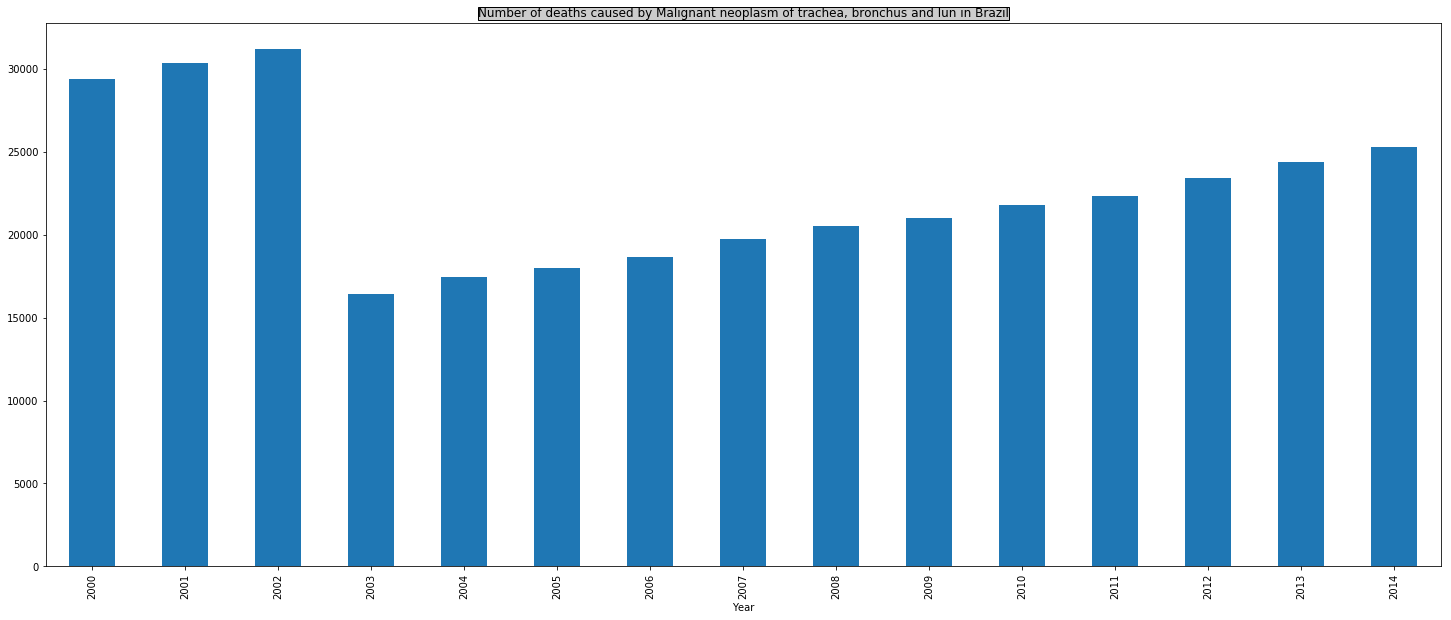

In [18]:
#Prenons l'exemple du Bresil: l'évolution du cancer de 2000 à 2015
df_Brazil = df_mort[df_mort['Location'] == 'Brazil']
df_Brazil_by_cancer=df_Brazil.groupby(['Year'])['Nb_deaths'].sum()
df_Brazil_by_cancer.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of deaths caused by Malignant neoplasm of trachea, bronchus and lun in Brazil', bbox={'facecolor':'0.8', 'pad':0})

La mortalité la plus grande est entre 2000 et 2002, ensuite elle decroit en 2003 considerablement et subit une légère augmentation jusqu'en 2014.

### Conclusion:
A l’issu de cette exploration, nous avons donc décidé de nous restreindre à la prédiction du taux de mortalité d’un cancer pour tous les pays présents dans les bases de données. 